# RF Power meter

For sinus wave power is measured as average - FM, PM (phase modulation) and CW. It should match $P_{pep}$

$P_{ave}=I_{rms}*V_{rms}$

To compute power from peak voltage measurements

$P_{ave}=\frac{I_{p-p}}{\sqrt2} * \frac{V_{p-p}}{\sqrt2}$

$P_{ave}=\frac{I_{p-p} * V_{p-p}}{2}$+

$P_{ave}=\frac{V_{p-p}^2}{2*R}$

RF signals such as AM and SSB have a constantly changing amplitude during transmission, like the image at the top of the page. For these signals, there will be points where the amplitude is at its greatest (see Figure 1). This is the "one RF cycle at the crest of the modulation envelope" in the definition. Other signals, such as FM, PM (phase modulation) and CW, have a constant amplitude, so every RF cycle is its "peak" cycle.

<img src="img1.png" width=400>

Once that cycle is identified, we calculate the average power over its complete duration. That's the red area above.

Note that we calculate the power in both the positive voltage half-cycle and the negative voltage half-cycle. They don't cancel out because, as shown below, the $V_{p-p}$ is squared, making both of them positive.

<img src="img2.png" width=400>

$P_{pep}=\frac{(V_{p-p}*\sqrt2)^2}{R}$

# References

https://sites.google.com/a/mdarc.org/mdarc/resources/technical/peak-envelope-power

https://qrp-labs.com/dummy.html

https://owenduffy.net/measurement/RfPowerTerms/PEP.htm


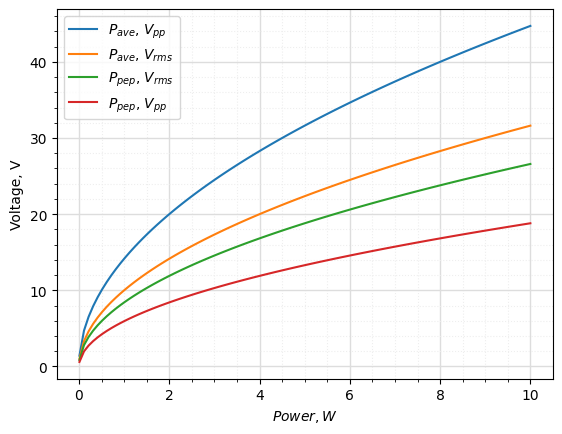

In [20]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import scipy.interpolate as interpolate

power = numpy.linspace(0.01, 10, 100)

fig, ax = plt.subplots()
ax.grid(which='major', color='#DDDDDD', linewidth=1)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.8)
ax.minorticks_on()

ax.plot(power, numpy.sqrt(power*2*50)*numpy.sqrt(2), label="$P_{ave}$, $V_{pp}$")
ax.plot(power, numpy.sqrt(power*2*50), label="$P_{ave}$, $V_{rms}$")
ax.plot(power, numpy.sqrt(power*50/numpy.sqrt(2))*numpy.sqrt(2), label="$P_{pep}$, $V_{rms}$")
ax.plot(power, numpy.sqrt(power*50/numpy.sqrt(2)), label="$P_{pep}$, $V_{pp}$")
plt.xlabel(r"$Power, W $")
plt.ylabel("Voltage, V")
plt.grid(True, which="both")
plt.rcParams['axes.formatter.min_exponent'] = 6
plt.legend()
plt.show()

In SPICE sumulation diode-capacitor-peak-detector.asc, I modeled two different diodes in a simple
voltage peak detector circuit. Notice that there is small difference in behavior across frequency. 

<img src="ltspice.jpg" width=400>

Owen Duffy used 1n5711 

https://owenduffy.net/blog/?p=25710
https://owenduffy.net/blog/?p=26018

but it was really not important. I tried other diodes, there are variation in frequency, signal amplitude but after a voltage divider and Arduino 10bit ADC all this precision will be lost anyway. 
Pretty much any diode will do. 

Owen Duffy admitted in email to me:

> ...I particularly like Ge diodes like 1N60, 1N34A, (1N270 for higher voltage), but hams KNOW that Schottky is better, so for appeal, I often use Schottky and 1N5711 is very available...

The capacitor in the peak detector has to be a low ESR type.

One thing that is not immediatelt obvious from these project pages, is that Owen Duffy had a callibrated RF powermeter. They used it to plot several power-to-voltage measurements and then did the curve fitting. This curve will be unique to a combination of Arduino internal voltage reference, the capacitor and the diode.